In [753]:
#imports for used packages 
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import binascii
import os
os.getcwd()

'C:\\Users\\AaronRosenmund\\Desktop\\DEMO\\code'

In [754]:
# read audio samples
samplerate, sampledata = read("..\\audiosamples\\waves\\WGP-2-20-T4.wav")
totalsamples = len(sampledata)
totaltime_s = totalsamples/samplerate

In [755]:
samplerate

44100

In [756]:
sampledata

array([  351,   608,   438, ...,  -920, -1486, -1004], dtype=int16)

In [757]:
totalsamples

72422427

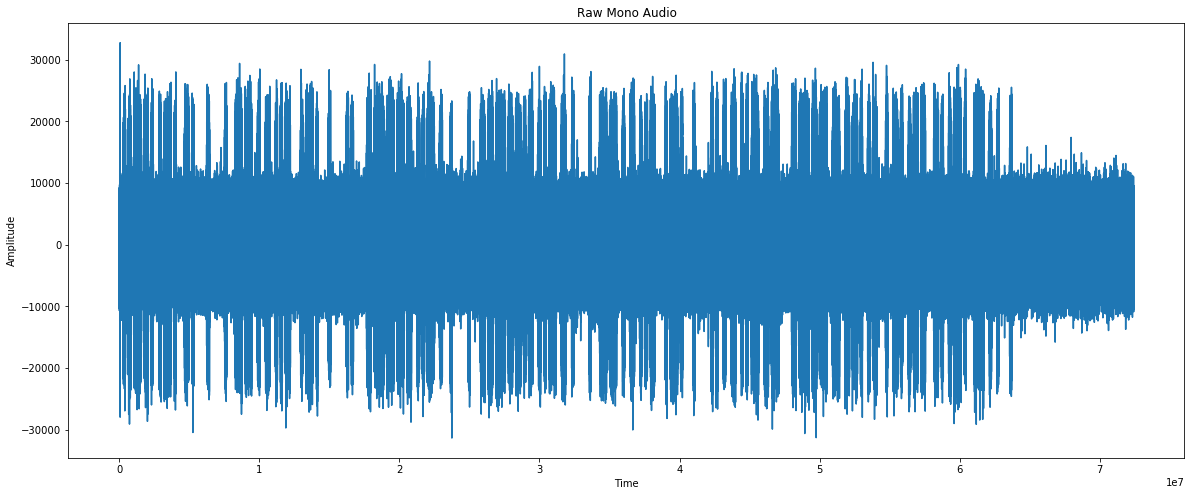

In [758]:
#plotting initial samples
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Raw Mono Audio")
plt.show()

In [759]:
#change values to postive values

sampledata = np.absolute(sampledata)

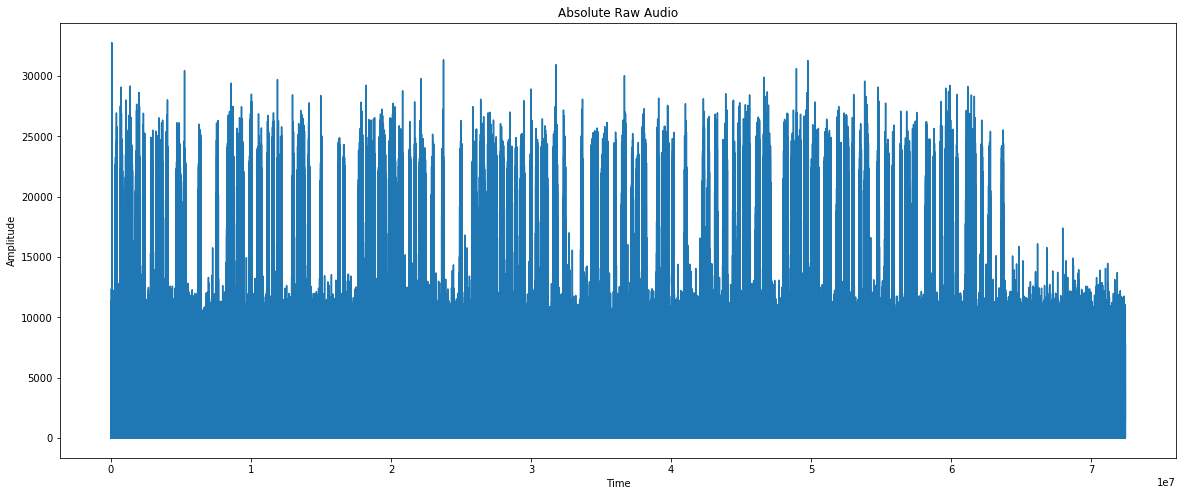

In [760]:
##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Absolute Raw Audio")
plt.show()

3204.2891589507212
0
32766
[ 351  608  438 ...  920 1486 1004]
69762874
[16242867 14622309 11898135  8887800  6241247  4260095  2920052  2065704
  1507853  1115883   822567   596187   423671   291926   196615   308104
    20699      703]
[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 20000 25000 30000]


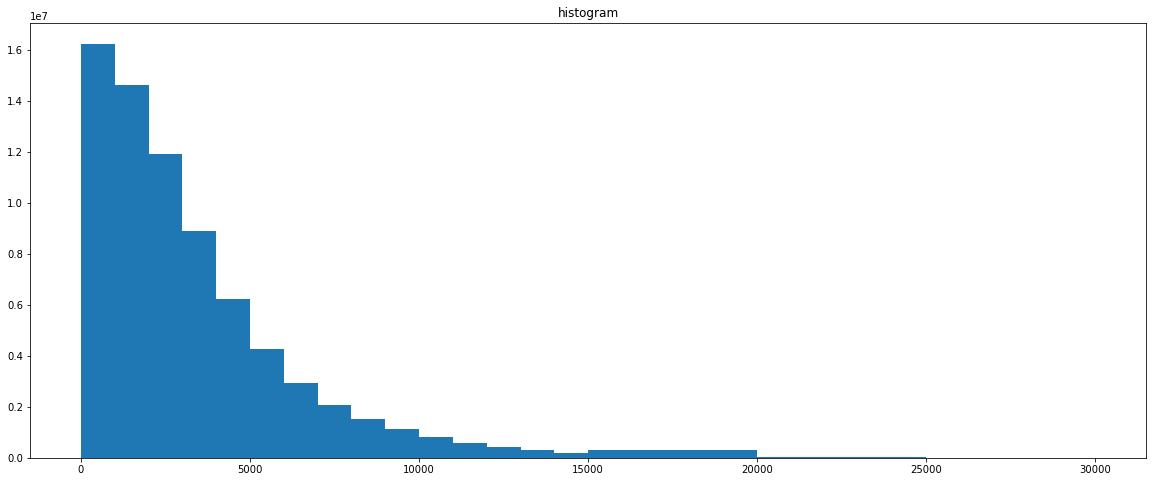

In [761]:
# researh and development
print(np.mean(sampledata))
print(np.amin(sampledata))
print(np.amax(sampledata))
zero_freq = sampledata[(sampledata <= 10000)]
print(zero_freq)
print(len(zero_freq))
np.histogram(sampledata,bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,25000,30000]) 
hist,bins = np.histogram(sampledata,bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,25000,30000]) 
print(hist) 
print(bins)
plt.figure(figsize=(20, 8))
plt.hist(sampledata, bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,25000,30000]) 
plt.title("histogram") 
plt.show()

3204.2891589507212
176400


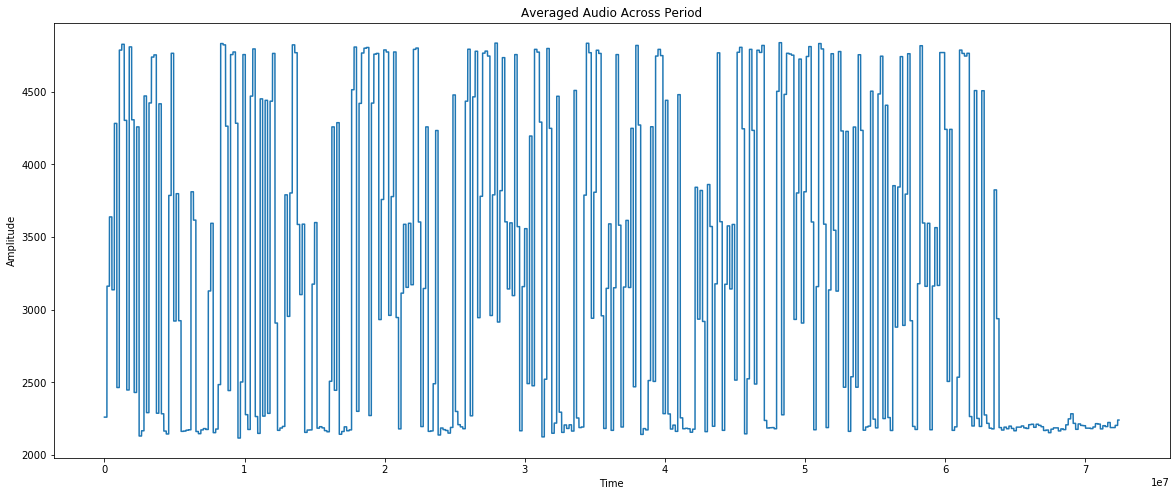

In [762]:
# grab mean of data for later use

average_amplitude = np.mean(sampledata)
print(average_amplitude)
# Transform data to a mean across a specific period (non moving mean)

# seconds used for data transmit in bits per second in transmit file 
seconds = 4

#seconds converted to a value of total samples
window = seconds * samplerate * 1.01
window = round(window, 0)
window = int(window)
print(window)

#calculate number of windows in dataset
total_windows = totalsamples/window
#run through data set and set values in each window equal to the mean of the window
i = 0
s = 0
f = window
while i < total_windows:
    average = np.mean(sampledata[s:f])
    sampledata[s:f] = average
    s+=window
    f+=window
    i+=1

# Make equal to the period of listening need to find a way to get close to the begining like a start signal.....
##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Averaged Audio Across Period")
plt.show()

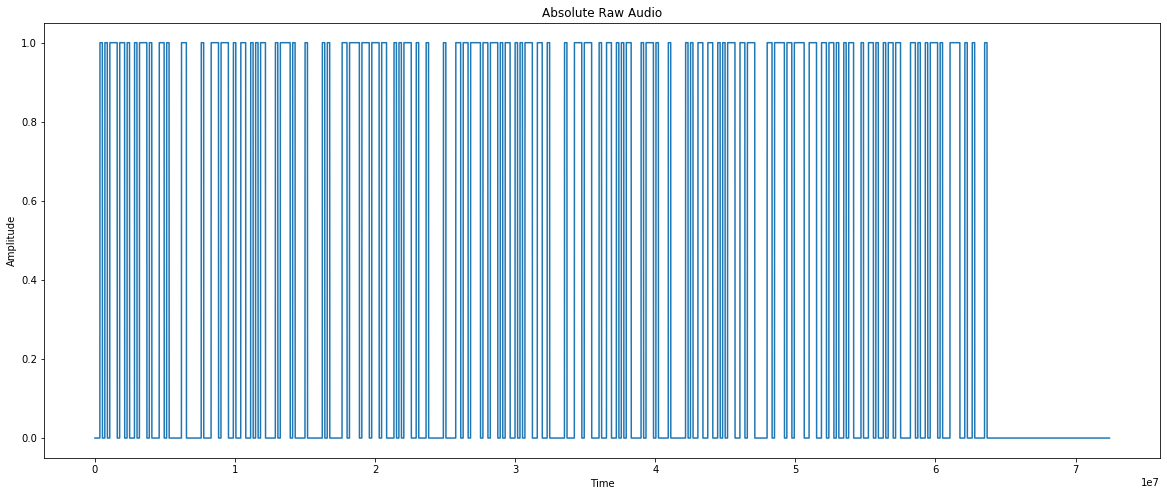

In [763]:
#then set all equal to specific averages.

sampledata[(sampledata < average_amplitude)] = 0
sampledata[(sampledata > average_amplitude)] = 1



##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Absolute Raw Audio")
plt.show()

In [764]:
#now need to turn that into 1 & 0
i = 1
halfp = int(window/2)
binString = ''
while i < total_windows:
    binString += str(sampledata[halfp-1])
    halfp+=window
    i+=1
binString    

'00101011101101001011101000110100000110000001000111011100100110010101100001011110100001000000101000001101111011101110110001010111001000100000010000110110111101101110101100101011100110010000001000111011100010011001010110000101110100001000000101001100110010101110011011100000110111101101111001110011011010010110001001101001011011000011010010111010001111001001000010000000000000000000000000000000000000000000000000'

In [765]:
len(binString)

410

In [766]:
print(binString)

00101011101101001011101000110100000110000001000111011100100110010101100001011110100001000000101000001101111011101110110001010111001000100000010000110110111101101110101100101011100110010000001000111011100010011001010110000101110100001000000101001100110010101110011011100000110111101101111001110011011010010110001001101001011011000011010010111010001111001001000010000000000000000000000000000000000000000000000000


In [767]:
#delete zeros and then add a zero
a = 0
while a == 0:
    if binString[0] == "0":
        binString = binString[1:]
    elif binString[0] == "1":
        a = 1
        print(binString)

binString = "0"+binString

print(binString)
    

101011101101001011101000110100000110000001000111011100100110010101100001011110100001000000101000001101111011101110110001010111001000100000010000110110111101101110101100101011100110010000001000111011100010011001010110000101110100001000000101001100110010101110011011100000110111101101111001110011011010010110001001101001011011000011010010111010001111001001000010000000000000000000000000000000000000000000000000
0101011101101001011101000110100000110000001000111011100100110010101100001011110100001000000101000001101111011101110110001010111001000100000010000110110111101101110101100101011100110010000001000111011100010011001010110000101110100001000000101001100110010101110011011100000110111101101111001110011011010010110001001101001011011000011010010111010001111001001000010000000000000000000000000000000000000000000000000


In [768]:
r = len(binString) % 8
print(r)
i = len(binString) - r
print(i)
i += 1
binString = binString[0:i-1]
len(binString)
binString

1
408


'010101110110100101110100011010000011000000100011101110010011001010110000101111010000100000010100000110111101110111011000101011100100010000001000011011011110110111010110010101110011001000000100011101110001001100101011000010111010000100000010100110011001010111001101110000011011110110111100111001101101001011000100110100101101100001101001011101000111100100100001000000000000000000000000000000000000000000000000'

In [769]:
binString

'010101110110100101110100011010000011000000100011101110010011001010110000101111010000100000010100000110111101110111011000101011100100010000001000011011011110110111010110010101110011001000000100011101110001001100101011000010111010000100000010100110011001010111001101110000011011110110111100111001101101001011000100110100101101100001101001011101000111100100100001000000000000000000000000000000000000000000000000'

In [770]:
#binString = binString.encode("utf-8")
binString = binString
n = int(binString, 2)
print(n)

n.to_bytes((n.bit_length() + 7) // 8, 'big').decode()

225719451988846719199170963197989942635680359417479983974481760854912224744624748677347385046667366311643616341838457208832


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 6: invalid start byte

In [ ]:
len(binString)